In [2]:
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

tqdm.pandas()

/home/hala/anaconda3/envs/py3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
comments = pd.read_csv('liketrainer/attack_annotated_comments.tsv', sep = '\t')
annotations = pd.read_csv('liketrainer/attack_annotations.tsv',  sep = '\t')
annotators = pd.read_csv('liketrainer/attack_worker_demographics.tsv',  sep = '\t')

### Schema for {attack/aggression/toxicity}_annotated_comments.tsv
The comment text and metadata for comments with attack/aggression/toxicity labels generated by crowd-workers. The actual labels are in the corresponding {attack/aggression/toxicity}_annotations.tsv since each comment was labeled multiple times.

- rev_id: MediaWiki revision id of the edit that added the comment to a talk page (i.e. discussion).
- comment: Comment text. Consists of the concatenation of content added during a revision/edit of a talk page. MediaWiki markup and HTML have been stripped out. To simplify tsv parsing, \n has been mapped to NEWLINE_TOKEN, \t has been mapped to TAB_TOKEN and " has been mapped to `.
- year: The year the comment was posted in.
- logged_in: Indicator for whether the user who made the comment was logged in. Takes on values in {0, 1}.
- ns: Namespace of the discussion page the comment was made in. Takes on values in {user, article}.
- sample: Indicates whether the comment came via random sampling of all comments, or whether it came from random sampling of the 5 comments around a block event for violating WP:npa or WP:HA. Takes on values in {random, blocked}.
- split: For model building in our paper we split comments into train, dev and test sets. Takes on values in {train, dev, test}.

In [4]:
print("Number of comments : ", len(annotations["rev_id"].unique()))


Number of comments :  115864


In [74]:
comments.sample()

,rev_id,comment,year,logged_in,ns,sample,split
30580,134735874,"NEWLINE_TOKENNEWLINE_TOKEN== Kiss My Ass, You ...",2007,True,user,blocked,train


In [75]:
comments["comment"] = comments["comment"].apply(
    lambda x: x.replace("NEWLINE_TOKEN", " ")
)
comments["comment"] = comments["comment"].apply(
    lambda x: x.replace("TAB_TOKEN", " ")
)

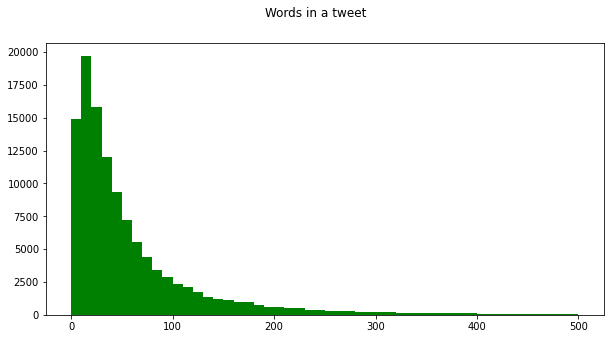

In [118]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
comments['len']=comments['comment'].str.split().map(lambda x: len(x))
ax.hist(tweet_len,color='green',bins=50,range=(0,500))
fig.suptitle('Words in a tweet')
plt.show()

In [98]:
tweet_len[tweet_len<50]

4          5
5         49
8         37
11        48
12        38
          ..
115851    43
115854    19
115855     4
115861    33
115863    39
Name: comment, Length: 71765, dtype: int64

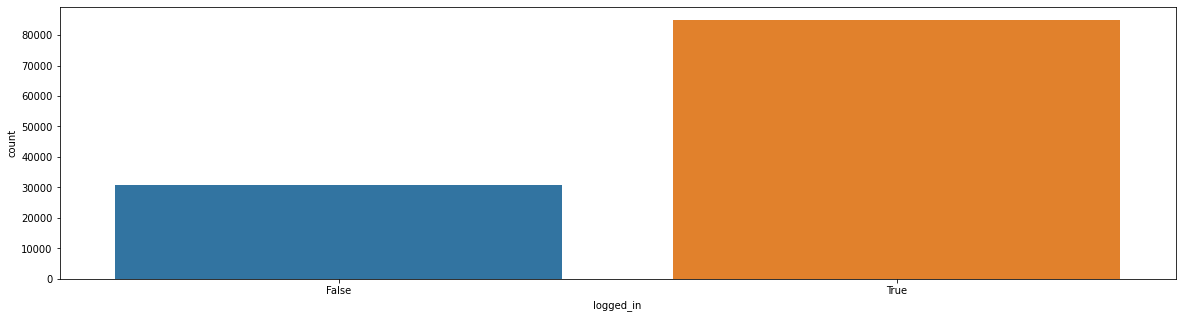

In [120]:
# comments['year'].hist()
import seaborn as sns
fig = plt.figure(figsize=(20,5))

g = sns.countplot(x="logged_in",data=comments)

In [ ]:

g = sns.countplot(x="year",data=comments)

In [34]:
len(comments)

115864

### Schema for attack_annotations.tsv
Personal attack labels from crowd-workers for each comment in attack_annotated_comments.tsv. It can be joined with attack_annotated_comments.tsv on rev_id.

- rev_id: MediaWiki revision id of the edit that added the comment to a talk page (i.e. discussion).
- worker_id: Anonymized crowd-worker id.
- quoting_attack: Indicator for whether the worker thought the comment is quoting or reporting a personal attack that originated in a different comment..
- recipient_attack: Indicator for whether the worker thought the comment contains a personal attack directed at the recipient of the comment.
- third_party_attack: Indicator for whether the worker thought the comment contains a personal attack directed at a third party.
- other_attack: Indicator for whether the worker thought the comment contains a personal attack but is not quoting attack, a recipient attack or third party attack.
- attack: Indicator for whether the worker thought the comment contains any form of personal attack. The exact question we posed can be found . The annotation takes on value 0 if the worker selected the option "This is not an attack or harassment" and value 1 otherwise.

In [35]:
annotations.head()

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,1362,0.0,0.0,0.0,0.0,0.0
1,37675,2408,0.0,0.0,0.0,0.0,0.0
2,37675,1493,0.0,0.0,0.0,0.0,0.0
3,37675,1439,0.0,0.0,0.0,0.0,0.0
4,37675,170,0.0,0.0,0.0,0.0,0.0


In [73]:
len(annotations['worker_id'].unique())

4053

### Schema for {attack/aggression/toxicity}_worker_demographics.tsv
Demographic information about the crowdworkers. This information was obtained by an optional demographic survey administered after the labelling task. It is meant to be joined with {attack/aggression/toxicity}_annotations.tsv on worker_id. Some fields may be blank if left unanswered.

- worker_id: Anonymized crowd-worker id.
- gender: The gender of the crowd-worker. Takes a value in {'male', 'female', and 'other'}.
- english_first_language: Does the crowd-worker describe English as their first language. Takes a value in {0, 1}.
- age_group: The age group of the crowd-worker. Takes on values in {'Under 18', '18-30', '30-45', '45-60', 'Over 60'}.
- education: The highest education level obtained by the crowd-worker. Takes on values in {'none', 'some', 'hs', 'bachelors', 'masters', 'doctorate', 'professional'}. Here 'none' means no schooling, some means 'some schooling', 'hs' means high school completion, and the remaining terms indicate completion of the corresponding degree type.

In [70]:
annotators.head()

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


In [71]:
annotators

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs
...,...,...,...,...,...
2185,1442,male,0,18-30,hs
2186,529,female,0,30-45,hs
2187,2036,female,0,18-30,masters
2188,393,female,0,18-30,masters


## Distribution of labels per feature group in training set

In [227]:
import numpy as np
from wordcloud import WordCloud, STOPWORDS

def analysis_plots(feature, values_groups,dataset):
    comments = pd.read_csv('liketrainer/attack_annotated_comments.tsv', sep = '\t')
    annotations = pd.read_csv('liketrainer/attack_annotations.tsv',  sep = '\t')
    annotators = pd.read_csv('liketrainer/attack_worker_demographics.tsv',  sep = '\t')

    values = set(values_groups.values())
    comments_with_annotators = annotations.merge(
        annotators, on="worker_id", how="left"
    )
    comments_with_annotators[feature] = comments_with_annotators[feature].map(values_groups)
    all_feature_counts_df = (
        comments_with_annotators.groupby(["rev_id", feature])["worker_id"]
        .count()
        .reset_index(name="count")
        .pivot("rev_id", feature, "count")
        .fillna(0)[values]
    )

    query = ' & '.join([f'{value} >=1' for value in values])

    feature_counts_df = all_feature_counts_df.query(query)

    comments = comments[comments["rev_id"].isin(feature_counts_df.index)]
    if dataset:
        comments = comments.query(f"split=='{dataset}'")
    annotations = annotations[annotations["rev_id"].isin(comments["rev_id"])]
    print(f"Number of {dataset} comments : ", len(annotations["rev_id"].unique()))

    # merge annotators with comments
    comments_with_annotators = annotations.merge(
        annotators, on="worker_id", how="left"
    )
    comments_with_annotators[feature] = comments_with_annotators[feature].map(values_groups)

    mixed_mean = comments_with_annotators.groupby(["rev_id"])['attack'].mean().reset_index(name="mean")
    features_mean = comments_with_annotators.groupby(["rev_id", feature])['attack'].mean().reset_index(name="mean").pivot("rev_id", feature, "mean")
    features_mean = features_mean[values]
    comments = mixed_mean.merge(comments, on="rev_id", how="left" ).rename(columns={"mean" : f"{feature}_mixed_attack"})
    comments = features_mean.merge(comments, on="rev_id", how="left").rename(columns={v : f"{feature}_{v}_attack" for v in values})
    
    print("Histograms")
    for value in values:
        print(f"{feature} {value}")
        all_feature_counts_df[value].hist(bins=int(all_feature_counts_df[value].max()))
        plt.show()
        
    print("============================================")
    print()
    for value1 in values:
        value1_comments = comments[comments[f"{feature}_{value1}_attack"] == True]
        print(f"total number of comments that {value1} finds hateful {len(value1_comments)}")
        for value2 in values:
            if value1 != value2:
                value2_comments = comments[comments[f"{feature}_{value2}_attack"] == True]
                intersection = value2_comments[value2_comments["rev_id"].isin(value1_comments["rev_id"])]
                print(f"     among these, {value2} finds {len(intersection)} also hateful")
        print()
    print("============================================")           
        
    values = list(values) + ["mixed"]

    for value in values:
        comments = comments[comments[f"{feature}_{value}_attack"] != -1]

    for value in values:
        comments[f"{feature}_{value}_attack"] = np.where(
            comments[f"{feature}_{value}_attack"] > 0.5, True, False
        )

    print("Value counts:")
    for value in values:
        print(f"{feature} {value}")
        plt.pie(comments[f"{feature}_{value}_attack"].value_counts(),labels=['False', 'True'], autopct='%1.1f%%',
            shadow=True, startangle=90)
        plt.show()
        
    comments["comment"] = comments["comment"].apply(
        lambda x: x.replace("NEWLINE_TOKEN", " ")
    )
    comments["comment"] = comments["comment"].apply(
        lambda x: x.replace("TAB_TOKEN", " ")
    )
    print("Word clouds:")
    for value in values:
        print(f"{feature} {value}")
        text = comments[comments[f"{feature}_{value}_attack"] == True]["comment"].values
        text= " ".join(text)
        wordcloud = WordCloud().generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

        

In [237]:
feature = "gender"
values_groups = {"male": "male", "female": "female"}

# feature = "english_first_language"
# values_groups = {0: "not_native", 1: "native"}

# feature = "age_group"
# values_groups = {'Under 18': 'under_30',
#                  '18-30' : 'under_30' ,
#                  '30-45' : 'over_30' , 
#                  '45-60' : 'over_30' , 
#                  'Over 60' : 'over_30'}

# feature = "education"
# values_groups = {'none': 'hs_below',
#                  'some' : 'hs_below' ,
#                  'hs' : 'hs_below' , 
#                  'bachelors' : 'hs_above' , 
#                  'masters' : 'hs_above' , 
#                  'doctorate' : 'hs_above' , 
#                  'professional' : 'hs_above'}


# dataset = "" 

# analysis_plots(feature, values_groups, dataset)

## Some annotators statistics

In [3]:
annotators = pd.read_csv('liketrainer/attack_worker_demographics.tsv',  sep = '\t')

In [4]:
import numpy as np
feature = 'gender'
value = 'female'

In [5]:
value_annotators= annotators[annotators[feature] == value].sample(500)
workers = value_annotators["worker_id"].unique()

In [6]:
workers_map = {w : i for w, i in zip(workers, range(len(workers)))}

In [7]:
comments_with_annotators = annotations.merge(
        annotators, on="worker_id", how="left"
    )

In [8]:

reliability_data = {value : }
reliability_data[value][:] = np.nan
i=0
for rev_id, group in tqdm(comments_with_annotators[comments_with_annotators[feature] == value].groupby('rev_id')):
    group = group.sample(10) if len(group) >=10 else group
    for _, row in group.iterrows():
        if row["worker_id"] in workers_map:
            reliability_data[value][workers_map[row["worker_id"]]][i] = int(row['attack'])
    i+=1

100%|██████████| 106825/106825 [01:02<00:00, 1697.61it/s]


In [9]:
import krippendorff
krippendorff.alpha(reliability_data=reliability_data[value], level_of_measurement='nominal')


0.0030753562283669655

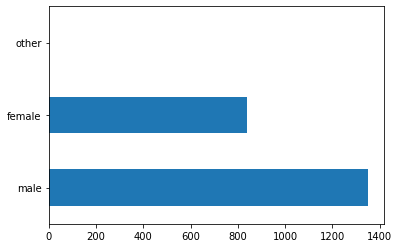

In [188]:
annotators['gender'].value_counts().plot.barh()

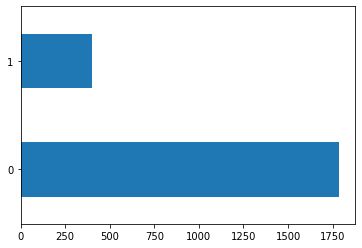

In [189]:
annotators['english_first_language'].value_counts().plot.barh()

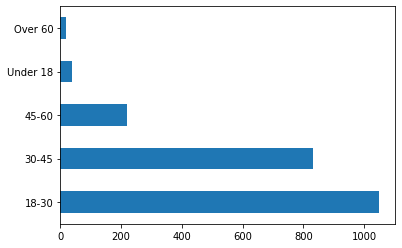

In [190]:
annotators['age_group'].value_counts().plot.barh()

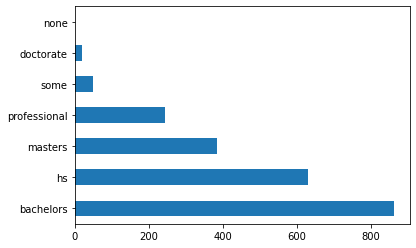

In [19]:
annotators['education'].value_counts().plot.barh()